<font size=7>  $\textrm{Tutorial} \ 1$  </font>

<font size=5>  $\textrm{Playing around with samples}$   </font>

<font size=5> $\textrm{Tasks:}$  </font>

In [54]:
# #### Hello world

# * Hello world using ChatGPT

# https://chat.openai.com/share/3fe4c03e-df5e-4d24-b355-ceb58af3c962

In [55]:
#This is the most basic code we can write in Python! We're telling the computer, please write to the console the following string of letters.
print("Hello, World!")

Hello, World!


In [56]:
#We definitely won't be writing all the code on our own. Using packages and libraries others have built is very convenient! Here's how we tell the computer it should bring those to our enviornment.
import numpy as np
import matplotlib.pyplot as plt

In [43]:
a = 5 #You can assign a value or an object to a variable by equating.
b = np.array([1,2,3,4]) #You can also make arrays of quantities. 
c = np.random.rand(5,5) #Here for example we create a matrix of random numbers of size 5x5

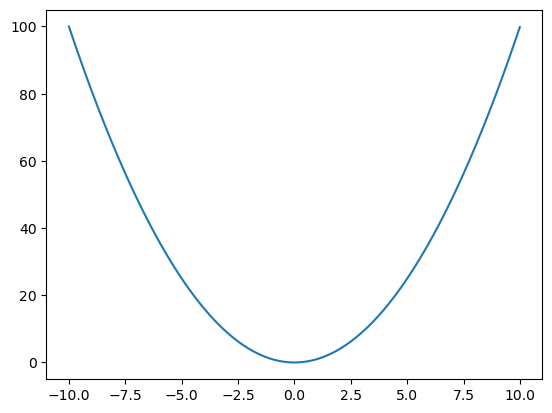

In [44]:
quad = np.arange(-10,10,0.01)**2
plt.plot(np.arange(-10,10,0.01),quad)

In [6]:
# #### Single spin-1/2

# * Take a spin-1/2, define amplitude 1/sqrt(2)
# * From probabilities take exact samples
# * Print samples
# * Reconstruct probability
# * Plot the probabilities

# $ |\Psi\rangle = \frac{1}{\sqrt{2}} \left( |\uparrow\rangle + |\downarrow\rangle\right) $ #

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
amplitude = 1 / np.sqrt(2)

# Define spin states
spin_states = [1, -1]

In [60]:
# Define probabilities
probabilities = np.abs([amplitude, amplitude])**2

# Take exact samples based on probabilities
samples = np.random.choice(spin_states, size=10000, p=probabilities)

In [61]:
# Print samples
print("Samples:", samples)

# Reconstruct probability
reconstructed_probabilities = np.unique(samples, return_counts=True)[1] / len(samples)

Samples: [ 1 -1  1 ...  1  1 -1]


In [10]:
np.abs(reconstructed_probabilities - probabilities)

array([0.0047, 0.0047])

In [63]:
np.unique(samples, return_counts=True)[1]

array([4975, 5025])

In [64]:
#Sampling is like putting your hand in a box and pulling out objects, the frequency which will they appear is given by the probability distribution!!

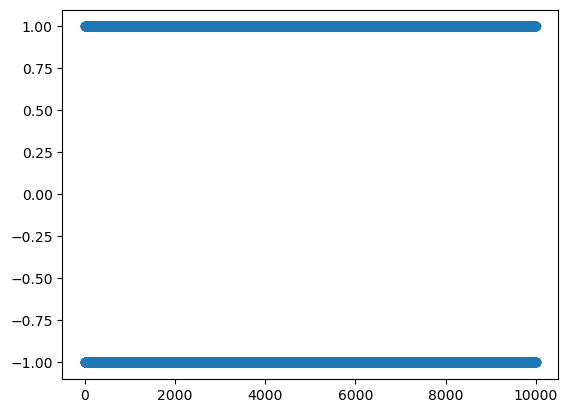

In [65]:
plt.scatter(np.arange(1,len(samples)+1,1),samples)

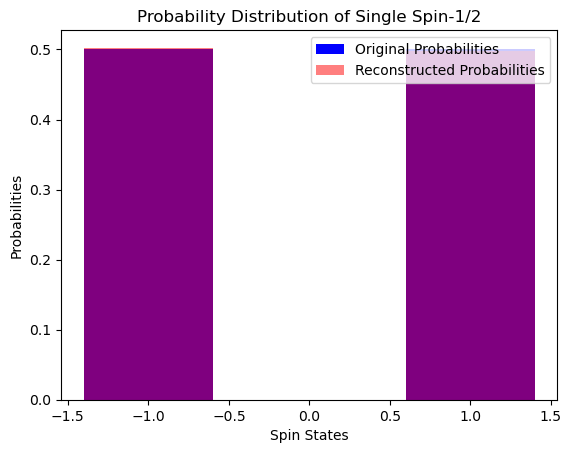

In [66]:
# Plot the probabilities
plt.bar(spin_states, probabilities, color='b', alpha=1, label='Original Probabilities')
plt.bar(spin_states, reconstructed_probabilities, color='r', alpha=0.5, label='Reconstructed Probabilities')
plt.xlabel('Spin States')
plt.ylabel('Probabilities')
plt.title('Probability Distribution of Single Spin-1/2')
plt.legend()
plt.show()

In [15]:
# #### Take N spin-1/2

# * Take all configurations equally probable
# * Some procedures as before
# * Now go for the Ising model
# * Probabilities: Boltzmann weights
# * Calculate partition function -> probabilities
# * Take exact samples at low temperatures 
# * Reconstruct probabilities
# * Plot and compare to Boltzmann weights

<font size=5> $\text{First lets construct all possible configurations!} $</font>

<font size=4> $[0,1,0]  \ \ \rightarrow \ \ 0 \cdot 2^{2} + 1 \cdot 2^{1} + 0 \cdot 2^{0} = 2$ </font>

In [16]:
def binary_to_decimal(binary_array):
    """Convert a binary array [0,1,1,...,0] to its decimal equivalent."""
    decimal_number = 0
    for bit in binary_array:
        decimal_number = (decimal_number << 1) | bit
    return decimal_number

# Example usage
binary_array = [ 0, 1, 0]
decimal_number = binary_to_decimal(binary_array)
print("Decimal number:", decimal_number)

Decimal number: 2


In [67]:
#Also the reverse function, integer to array
def integer_to_binary(n, N):
    """Convert an integer to a binary array of a specified length."""
    return [int(x) for x in bin(n)[2:].zfill(N)]

In [69]:
#With this we can now generate all possible configurations 
def generate_binary_matrix(N):
    """Generate a matrix of all possible binary vectors of order N."""
    num_vectors = 2 ** N
    matrix = np.zeros((N, num_vectors), dtype=int)
    
    for i in range(num_vectors):
        # Convert the integer i to a binary vector and place it in the matrix
        binary_vector = integer_to_binary(i, N)
        matrix[:, i] = binary_vector
    
    return matrix

In [70]:
configs = generate_binary_matrix(4)

In [73]:
configs

array([[-1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1],
       [-1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1],
       [-1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1],
       [-1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1]])

In [72]:
configs = 2*configs - 1

<font size=5> $H = - J \sum_{i=1}^{N-1} S^z_i S^z_{i+1} $</font>

<font size=4> $\text{Lets think about this energy for a bit.\ \ \ Which configurations have the lowest energy?} $</font>

In [74]:
def Energy(spins, J=1):
    """
    Calculate the energy of a spin configuration using the 1-D nearest neighbor Hamiltonian.
    
    Parameters:
        spins (list or numpy array): Array of spins (values should be +1 or -1).
        J (float): Coupling constant, positive for ferromagnetic and negative for antiferromagnetic.
    
    Returns:
        float: The calculated energy of the configuration.
    """
    N = len(spins)
    energy = 0
    # Sum over all nearest neighbor pairs
    for i in range(N - 1):
        energy -= J * spins[i] * spins[i + 1]
    return energy

In [75]:
E_configs = np.apply_along_axis(Energy, 0, configs)

In [76]:
E_configs

array([-3, -1,  1, -1,  1,  3,  1, -1, -1,  1,  3,  1, -1,  1, -1, -3])

<font size=5> $Z = \sum_{i} e^{-\beta E_i} $</font>

<font size=5> $Z = \sum_{i} e^{\beta J \sum_{i=1}^{N-1} S^z_i S^z_{i+1}} $</font>

In [24]:
def Boltzmann_factors(cfgs, beta, J=1):
    """Compute the partition function for a given set of configurations and temperature."""
    # Calculate energies for each configuration (column) in the matrix
    energies = np.apply_along_axis(Energy, 0, cfgs, J=J)
    # Calculate Boltzmann factors
    boltzmann_factors = np.exp(-1*beta*energies )

    return boltzmann_factors

def partition_function(cfgs, beta, J=1):

    boltzmann_factors = Boltzmann_factors(cfgs, beta, J=1)
    Z = np.sum(boltzmann_factors)
    return Z


def Probs(cfgs, beta, J=1):
    bmf = Boltzmann_factors(cfgs, beta, J=1)
    Z = np.sum(bmf)

    return bmf/Z

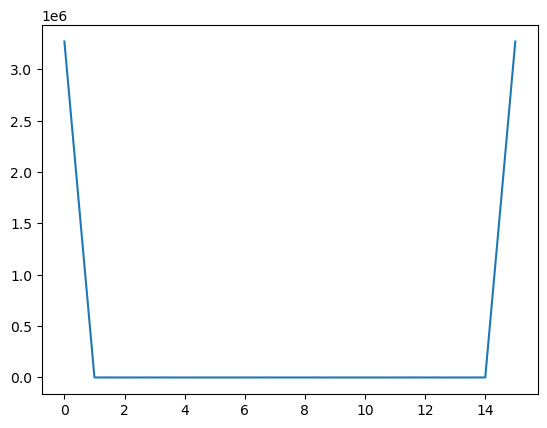

In [77]:
plt.plot(Boltzmann_factors(configs, 5, J=1))

<BarContainer object of 16 artists>

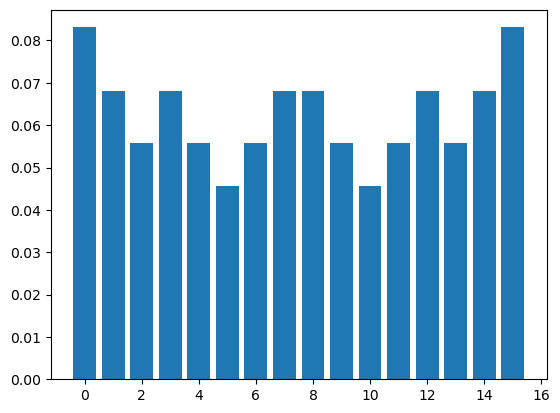

In [78]:
Probab =Probs(configs, .1, J=1)
plt.bar(range(len(Probab)),Probab)

In [79]:
from ipywidgets import interactive

In [80]:
def plot_boltzmann_factors(beta):
    """Plot Boltzmann factors as a function of the decimal index of each configuration."""
    N = 4  # Set the number of spins
    matrix = generate_binary_matrix(N)
    factors = Boltzmann_factors(matrix, beta, J=1)
    
    plt.figure(figsize=(10, 6))
    Probab =Probs(configs, beta, J=1)
    plt.bar(range(len(Probab)),Probab)
    plt.xlabel('Decimal Index of Configuration')
    plt.ylabel('Boltzmann Factor')
    plt.title(f'Probabilities at inverse Temperature beta ={beta:.2f}')
    plt.grid(True)
    plt.show()

In [81]:
interactive_plot = interactive(plot_boltzmann_factors, beta=(0.001, 3, 0.1))
display(interactive_plot)

interactive(children=(FloatSlider(value=1.401, description='beta', max=3.0, min=0.001), Output()), _dom_classe…

In [82]:
samples

array([ 1, -1,  1, ...,  1,  1, -1])

<font size=4> $\text{Now we sample at low temperatures,} \  \beta = 10$ </font>

In [84]:
samples = np.random.choice(range(len(Probab)), size=10000, p=Probs(configs, 10))

recons_probabilities = np.unique(samples, return_counts=True)[1] / len(samples)

In [85]:
recons_probabilities

array([0.5057, 0.4943])

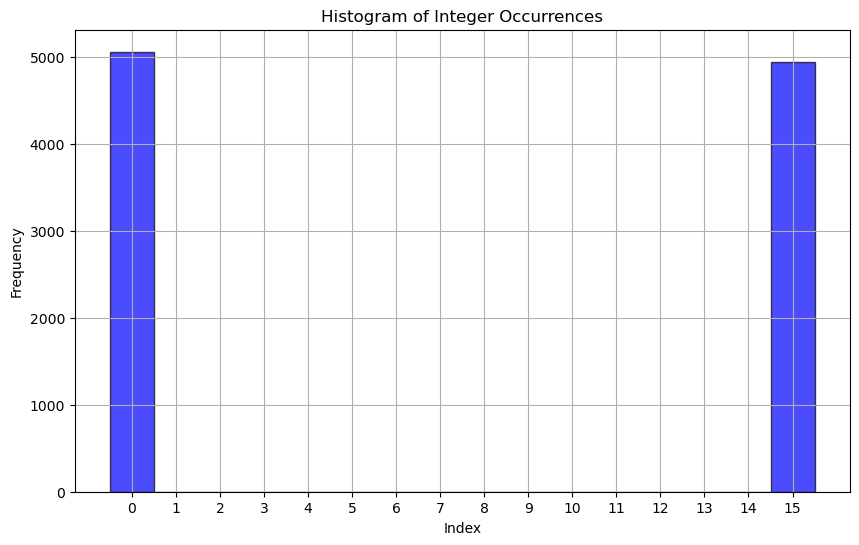

In [86]:
# Create bins from min to max with each bin centered on an integer

# Determine the range of data for setting bin edges
min_val = int(np.min(samples)) - 0.5
max_val = int(np.max(samples)) + 1.5

# Create bins from min to max with each bin centered on an integer
bins = np.arange(min_val, max_val, 1)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=bins, alpha=0.7, color='blue', edgecolor='black')

# Set ticks to be at the center of each bin
plt.xticks(np.arange(int(min_val + 0.5), int(max_val - 0.5), 1))

plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('Histogram of Integer Occurrences')
plt.grid(True)
plt.show()


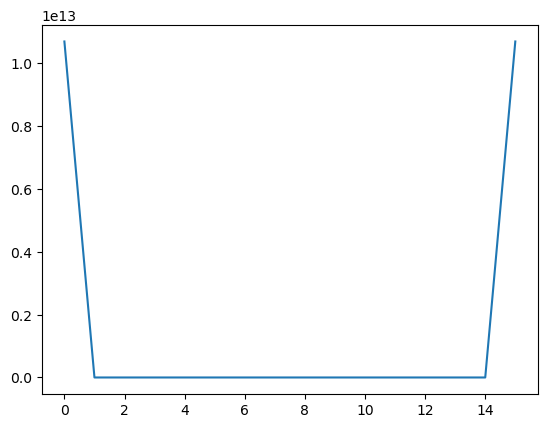

In [34]:
plt.plot(Boltzmann_factors(configs, 10, J=1))

In [87]:
# #### Metropolis-Hastings Monte-Carlo

# * Take again the Ising model with the same N
# * Let ChatGPT give you a MC algorithm
# * Let it run to generate samples
# * Check that again you'll find typically aligned spins
# * Reconstruct probabilities
# * Plot and compare to the previous case and compare to Boltzmann weights

In [36]:
def metropolis_step(spins, beta, J=1):
    """
    Perform one step of the Metropolis algorithm.
    
    Parameters:
        spins (np.array): Current configuration of spins.
        T (float): Temperature of the system.
        J (float): Interaction energy coefficient.
        
    Returns:
        np.array: Updated configuration of spins.
    """
    N = len(spins)
    spins_og = np.copy(spins)
    i = np.random.randint(N)  # Randomly pick a spin to flip
    spins[i] *= -1            # Flip the spin
    
    # Calculate energy change if this flip is accepted
    if i == 0:
        # First spin, no left neighbor
        delta_E = -2 * J * spins[i] * spins[i + 1]
    elif i == N - 1:
        # Last spin, no right neighbor
        delta_E = -2 * J * spins[i] * spins[i - 1]
    else:
        # Middle spins with both neighbors
        delta_E = -2 * J * spins[i] * (spins[i - 1] + spins[i + 1])

    # Metropolis criterion
    if delta_E < 0 or np.random.rand() < np.exp(-1*delta_E * beta):
        # Accept the flip
        return spins
    else:
        # Revert the flip (reject)
        spins[i] *= -1
        return spins

In [3]:
def run_metropolis(N, beta,numSamples,J=1, sample_interval=10):
    """
    Run the Metropolis Monte Carlo algorithm to sample spin configurations after allowing the system to equilibrate,
    and with a specified interval between samples to reduce autocorrelation.
    
    Parameters:
        N (int): Number of spins.
        T (float): Temperature.
        J (float): Interaction energy coefficient.
        steps (int): Total number of Metropolis steps to perform.
        equilibration_steps (int): Number of steps to discard at the start to allow the system to equilibrate.
        sample_interval (int): Interval of steps between collecting samples to reduce autocorrelation.
        
    Returns:
        list: A list of sampled spin configurations.
    """
    
    equilibration_steps=20*N
    steps=equilibration_steps + sample_interval*numSamples
    
    spins = np.random.choice([-1, 1], size=N)  # Initial random spins
    samples = []
    
    for step in range(steps):
        spins = metropolis_step(spins, beta, J)  
        
        # Only start collecting samples after the equilibration period
        if step >= equilibration_steps and (step - equilibration_steps) % sample_interval == 0:
            samples.append(spins.copy())  # Collect samples at specified intervals
    
    return np.array(samples)

# Example usage
N = 4  # Number of spins
beta = 3.5 # Inverse Temperature
number_samples = 5000
samples = run_metropolis(N, beta,5000,sample_interval=200)



NameError: name 'np' is not defined

In [109]:
samples

array([[-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       ...,
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1]])

In [110]:
cfgs_sampled = np.apply_along_axis(binary_to_decimal, 1, (samples + 1)//2)

In [111]:
cfgs_sampled

array([0, 0, 0, ..., 0, 0, 0])

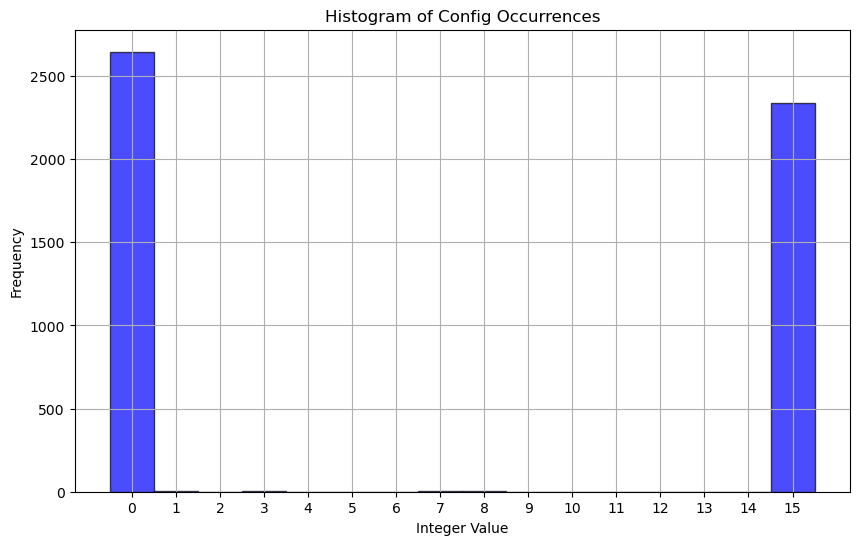

In [112]:
# Create bins from min to max with each bin centered on an integer

# Determine the range of data for setting bin edges
min_val = int(np.min(cfgs_sampled)) - 0.5
max_val = int(np.max(cfgs_sampled)) + 1.5

# Create bins from min to max with each bin centered on an integer
bins = np.arange(min_val, max_val, 1)

plt.figure(figsize=(10, 6))
plt.hist(cfgs_sampled, bins=bins, alpha=0.7, color='blue', edgecolor='black')

# Set ticks to be at the center of each bin
plt.xticks(np.arange(int(min_val + 0.5), int(max_val - 0.5), 1))

plt.xlabel('Integer Value')
plt.ylabel('Frequency')
plt.title('Histogram of Config Occurrences')
plt.grid(True)
plt.show()